# Rubbish tutorial

This notebook will provide a detailed walkthrough of rubbish's features and demonstrate how it should be used in practice. Rubbish is an R package developed by LexisNexis Risk Solutions that aims to help modelers build Scorecards quickly, efficiently, and without sacrificing predictive power. This walkthrough requiresa few prequisites before beginning.

## Prequisites

Jupter is a general programming platform that allows users to annotate data analyses with commentary in a linear notebook. It excels at intermixing code and exposition for maximum readability and is well-suited for tutorials. The recommended method for installing Jupyter on windows is through the <a href="https://www.continuum.io/Downloads">Anaconda Python distribution</a>.

As mentioned earlier, Jupyter is a *general* framework and as such supports many different languages. Though out-of-the-box it only supports Python. The next step is to add support for the R programming language. From within RStudio enter the following.

### Installing `devtools` and the IRKernel

In [ ]:
install.packages('devtools')
install.pacakges('installr')
devtools::install_github('IRkernel/IRkernel')
IRkernel::installspec()  # to register the kernel in the current R installation

The preceding lines install the `devtools` R package which provides support functions for working with R pacakges. `devtools` allows users to install packages hosted directly on <a hhref="github.com">Github</a>. This is where the Jupyter support for the R language is hosted (also called a kernel).

### Installing Rtools

The freshest way to install a package is to install it from *source*. Source packages are a collection of raw files that have not yet been compiled for your machine. Windows does not come with the tools necessary to do this so they must be installed. The `installr` package provides an easy-to-use function to install what we need.

In [ ]:
installr::install.rtools()
devtools::setup_rtools()

### Installing `rubbish`

`devtools` is the preferred method of install `rubbish` from a local repository hosted on <a href="https://gitlab.ins.risk.regn.net/">Gitlab</a>. The following lines do just that:

In [ ]:
devtools::install_git("https://gitlab.ins.risk.regn.net/minneapolis-r-packages/rubbish.git")

# Getting Started with Rubbish

Rubbish comes with a dataset of titanic survivors. We will be using it throughout this tutorial.

In [1]:
require(rubbish)
data(titanic)
head(titanic)

Loading required package: rubbish


Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,NA,0,0,8.4583,Q


## Binning a `data.frame`

The first step when building a scorecard with `rubbish` is to prepare the data for modeling. The first step in this process is binning the data using the `bin` function. The `bin` function discretizes continuous variables where applicable and wraps all variables in a Scorecard object that can be easily manipulated.

In [2]:
mod <- bin(titanic, titanic$Survived)

Binning    : ==========| Embarked                                          


In [3]:
class(mod)
mod

[1] "Scorecard"
attr(,"package")
[1] "rubbish"

1 models
 |-- *  scratch              | 00.0 ks | 

Binning a data.frame returns a scorecard object. A scorecard object consists of a classing and any models that are fit during development. An initial scorecard has one model called "scratch" which isn't really model at all but rather a starting point for fitting other models.

#### Bin arguments

There are many arguments that can be passed to the `bin` funciton. Each controls some aspect of the discretization process. These arguments are optional as `bin` uses a set of sensible defaults.

| Argument | Default | Definition |
|---|---|---|
|data | | `data.frame` of independent predictors to discretize. |
|y| |Response variable. Currently only binary responses are supported. |
|w| All 1s | Optional weight variable|
|min.iv|.001|The minimum information value to split a continuous variable.|
|min.cnt|25|The minumum number of observations that must be in a bin after any split.|
|min.res|5|The minimum number of response observations that must be in a bin after any split.|
|mono|0|Monotoncity constraint (see below) |
|max.bin|10|The maximum number of bins into which x is discretized.|
|exceptions||A numeric vector of values to be excluded from the discretization process.|

| Monotonicity | Defintion |
|---|---|
|0|No monotoncity enforced - the default. |
|1|Increasing monotoncically with y |
|-1 |Decreasing monotoncically with y |
|2|Either increasing or decreasing montonically with y|

### Inspecting binned variables

Binned variables can be viewed both graphically and in text format as a table.

In [4]:
mod$variables$Age

Age
                        N  #1  #0    %N    %1    %0  P(1)    WoE    IV   Pred
[01]  ( -Inf -   6.5]  47  33  14 0.053 0.096 0.026 0.702  1.331 0.094  1.331
[02]  (  6.5 - 14.75]  31  12  19 0.035 0.035 0.035 0.387  0.014 0.000  0.014
[03]  (14.75 -  17.5]  35  16  19 0.039 0.047 0.035 0.457  0.301 0.004  0.301
[04]  ( 17.5 - 30.75] 298 105 193 0.334 0.307 0.352 0.352 -0.135 0.006 -0.135
[05]  (30.75 - 36.25] 108  52  56 0.121 0.152 0.102 0.481  0.399 0.020  0.399
[06]  (36.25 -  42.5]  66  25  41 0.074 0.073 0.075 0.379 -0.021 0.000 -0.021
[07]  ( 42.5 -  47.5]  40  10  30 0.045 0.029 0.055 0.250 -0.625 0.016 -0.625
[08]  ( 47.5 -  50.5]  25  15  10 0.028 0.044 0.018 0.600  0.879 0.023  0.879
[09]  ( 50.5 -  58.5]  36  15  21 0.040 0.044 0.038 0.417  0.137 0.001  0.137
[10]  ( 58.5 -   Inf]  28   7  21 0.031 0.020 0.038 0.250 -0.625 0.011 -0.625
[11]  Missing         177  52 125 0.199 0.152 0.228 0.294 -0.404 0.031 -0.404
                      891 342 549 1.000 1.000 1.000 0.000  0

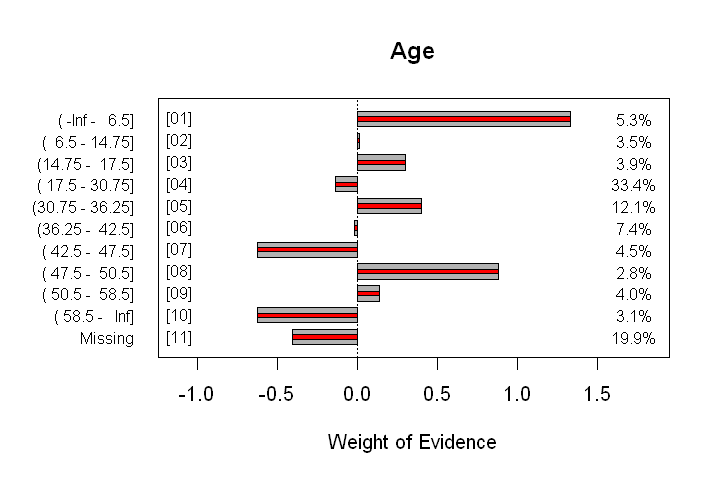

In [5]:
options(repr.plot.width=6, repr.plot.height=4)
mod$variables$Age$plot()

Variables are typically not inspected in this manner. Usually a modeler will call a Scorecard's `adjust` method to enter an interactive variable editing mode. However, static documentation does not make this possible.

### Removing Correlated Predictors

Multi-collinearity can still be an issue even for machine learning algorithms such as the one employed by `rubbish`. A sensible first step when working with rubbish is to identify which groups of variables are correlated and pick a representative of each. `rubbish` provides two scorecard methods to aid in this analysis: `cluster` `prune_clusters`.

Predicting : ==========| Embarked                                          


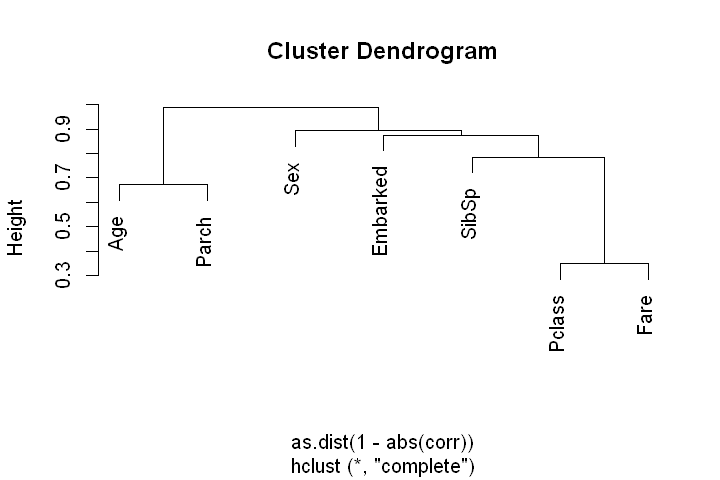

In [6]:
cc <- mod$cluster()
plot(cc$cluster)

The `cluster` method first substitutes the observed weight of evidence for the input data.frame and the runs base R `corr` function. The result is an object called a `classing_cluster`. This is simply a list with two items. The first is a numeric correlation matrix and the second is a hierarchichal cluster object. The cluster object can be used to find which groups of variables are correlated within a certain threshold. The plot above shows that Pclass and Fare are closetly correlated. This makes intuitive sense as Fare tends to increase with Passenger Class.

### Pruning Correlated Variables

We can pass the output of the cluster method into `prune_clusters` and specify a correlation threshold as well as a number of variables to keep. `prune_clusters` looks at all groups of correlated variables above the specified threshold. It returns a list of variables to drop that exceed the requested number to keep. For example, if 10 variables are correlated with each other at an R^2 above 0.80 and we request `N=1` variables be kept, `prune_clusters` will keep the most informative variable of the group and return the names of the other nine.

In [7]:
to_drop <- mod$prune_clusters(cc, corr = .60, n = 1)
print(to_drop)

       1 
"Pclass" 


The variables in the Titanic dataset are not very correlated so a `corr` of 0.60 is provided for illustrative purposes. In this case, `prune_clusters` suggests the variable Pclass should be dropped because Fare has a higher information value. This can be shown by calling the `summary` method of the Scorecard object:

In [8]:
mod$summary()

scratch 
Out-of-Fold KS:  0 


,IV,N,#1,#0,P(1),N missing,N Exceptions,Dropped,In Model,Coefs,Contribution
Survived,0.00000000,891,342,549,0,0,0,1,0,NA,NA
Pclass,0.50094974,891,342,549,0,0,0,0,0,NA,NA
Sex,1.34168141,891,342,549,0,0,0,0,0,NA,NA
Age,0.20503919,891,342,549,0,177,0,0,0,NA,NA
SibSp,0.17793168,891,342,549,0,0,0,0,0,NA,NA
Parch,0.09745514,891,342,549,0,0,0,0,0,NA,NA
Fare,0.74722120,891,342,549,0,0,0,0,0,NA,NA
Embarked,0.12940396,891,342,549,0,0,0,0,0,NA,NA


Indeed, Fare has an information value of 0.74 while Pclass has an information value of only 0.50. In a real model development, the supplied `corr` argument would be much higher (say 0.80 or 0.90). `prune_clusters` returns a list of variables to drop, but how are they dropped in practice? Again, the Scorecard object provides a method for dropping variables: `drop`

In [9]:
mod$drop(to_drop)
mod$dropped

[1] "Survived" "Pclass"

## Fitting a model

After correlated variables have been handled, the next step when modeling with `rubbish` is to fit a model to the data. The model is fit using the excellent `glmnet` package which fits regularized regression and classification models. Regularized (or penalized) models are considered a better than traditional glm models because they penalize coefficients from becoming too large. The type of penalty is a hyper-parameter that can be tuned, but in practice the L1 penalty, or LASSO, works well and results in parsimonious models with fewer variables.

Fitting a `rubbish` model is as easy as calling the method and passing in a model name and optional description:

In [10]:
mod$fit("model 1", "initial model with all variables")
mod

Predicting : ==========| Embarked                                          


2 models
 |--    scratch              | 00.0 ks | 
 |-- *  model 1              | 59.6 ks | initial model with all variables

The following steps are conducted when fitting a model using `rubbish`:

1. First, the weight-of-evidence for all variable bins is substituted for the actual independe variable values. This has the effect of enforcing a linear relationship with the outcome and produces an entirely numeric dataset which `glmnet` requires.
2. Secondly, the numeric matrix is passed into `glmnet` and a model is fit using K-fold cross validation to pick the best parameters.
3. Once the model parameters are fit, the out-of-fold KS as well as the independent variable contributions are calculated.
4. Lastly the model is added to the scorecard object.

The model coefficients and conctributions can be view the summary function like before:

In [11]:
mod$summary()

model 1 
Out-of-Fold KS:  0.5962995 


,IV,N,#1,#0,P(1),N missing,N Exceptions,Dropped,In Model,Coefs,Contribution
Survived,0.00000000,891,342,549,0,0,0,1,0,NA,NA
Pclass,0.50094974,891,342,549,0,0,0,1,0,NA,NA
Sex,1.34168141,891,342,549,0,0,0,0,1,0.9073497,0.154968747
Age,0.20503919,891,342,549,0,177,0,0,1,0.9513867,0.022200443
SibSp,0.17793168,891,342,549,0,0,0,0,1,0.5241223,0.006995610
Parch,0.09745514,891,342,549,0,0,0,0,0,NA,NA
Fare,0.74722120,891,342,549,0,0,0,0,1,0.6324211,0.034515741
Embarked,0.12940396,891,342,549,0,0,0,0,1,0.7114175,0.007491117


### Sorting the variables

The Scorecard has a `sort` method which can be used to re-arrange the model variables first by which variables are in th model, then by information value, and lastly by which variables are dropped. Sorting a scorecard puts the most important variables first.

In [12]:
mod$sort()
mod$summary()

model 1 
Out-of-Fold KS:  0.5962995 


,IV,N,#1,#0,P(1),N missing,N Exceptions,Dropped,In Model,Coefs,Contribution
Sex,1.34168141,891,342,549,0,0,0,0,1,0.9073497,0.154968747
Fare,0.74722120,891,342,549,0,0,0,0,1,0.6324211,0.034515741
Age,0.20503919,891,342,549,0,177,0,0,1,0.9513867,0.022200443
SibSp,0.17793168,891,342,549,0,0,0,0,1,0.5241223,0.006995610
Embarked,0.12940396,891,342,549,0,0,0,0,1,0.7114175,0.007491117
Parch,0.09745514,891,342,549,0,0,0,0,0,NA,NA
Pclass,0.50094974,891,342,549,0,0,0,1,0,NA,NA
Survived,0.00000000,891,342,549,0,0,0,1,0,NA,NA


## Adjusting Variables

Variables often need to be adjusted. Certain bin levels may have to be treated specially for regulatory reasons. In other cases, the default discretization may not be good enough and the modeler may wish to combine or expand levels. `rubbish` provides methods for accomplishing all of these tasks. They are typically accessed via the Scorecard `adjust` method, but as mentioned earlier, that does not work in a static document like this.

### Expanding and Collapsing Levels